<a href="https://colab.research.google.com/github/dlsun/Stat350F19/blob/master/Power_Spectral_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Plotting Functions
import matplotlib.pyplot as plt

def plot(f, xlim=(-0.5, 0.5)):
  xmin, xmax = xlim
  x = np.linspace(xmin, xmax, 1000)
  plt.plot(x, f(x), '-')

def plot_delta(x, height):
  plt.plot([x, x], [0, height], '-', linewidth=2)

# Power Spectral Density

In the previous lecture, we saw that the average expected power in a stationary process is $C(0) + \mu^2$. In this lecture, we examine how this power is distributed across frequencies.

## Wiener-Khinchin Theorem

The **power spectral density** (PSD) of a stationary process $\{ X(t) \}$ with mean $\mu$ and autocovariance function $C(\Delta t)$ is the Fourier transform of $C(\Delta t) + \mu^2$. The PSD is denoted $S_X(f)$.

$$ C(\Delta t) + \mu^2 \overset{\mathcal{F}}{\longleftrightarrow} S_X(f) $$

For now, just take this to be the definition of the PSD. We'll see later why it makes sense to call $S_X(f)$ the "power spectral density".

**Note:** $R(\Delta t) = C(\Delta t) + \mu^2$ is often called the **autocorrelation function**. We will not use this terminology in this class, but you will see it in EE 314.

# A Continuous Example

Suppose $\{ X(t) \}$ is a continuous-time Gaussian process with mean function $\mu(t) = 2$ and autocovariance function 
$$ C(s, t) = \begin{cases}
10 - 30|s - t| & |s - t| < 1/3 \\ 0 & \text{otherwise} \end{cases}. $$
What is the power spectral density of $\{ X(t) \}$?

$\DeclareMathOperator{\sinc}{sinc}
\DeclareMathOperator{\tri}{tri}$

The PSD is the Fourier transform of 

$$ C(\Delta t) + \mu^2 = 10 \tri(3 \Delta t) + 2^2 $$

which is 

\begin{align}
S_X(f) &= 10 \cdot \frac{1}{3} \sinc^2(f / 3) + 4 \delta(f).
\end{align}

Let's graph this PSD.

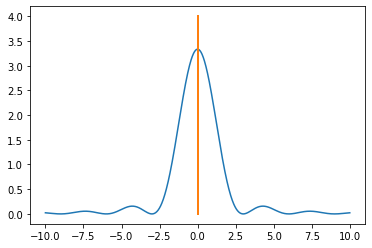

In [2]:
import numpy as np

def ac(f):
  return 10 / 3 * np.sinc(f / 3) ** 2

plot(ac, xlim=(-10, 10))
plot_delta(0, 4)

One way to check that we've done this correctly is to integrate the PSD over all frequencies. We should get the average expected power, which we know should equal $C_X(0) + \mu^2 = 10 + 2^2 = 14$.

\begin{align}
\int_{-\infty}^\infty S_X(f)\,df &= \int_{-\infty}^\infty \frac{10}{3} \sinc^2(f/3)\,df + 4 \\
&= 10 + 4
\end{align}

I did [the integral using Wolfram Alpha](https://www.wolframalpha.com/input/?i=integrate+10%2F3+*+%28sin%28pi+*+f%2F3%29+%2F+%28pi+*+f%2F3%29%29%5E2+from+f%3D-infinity+to+infinity). If you use Wolfram Alpha, beware that their $\sinc$ function is defined differently. I always just type the definition of $\sinc$ in terms of $\sin$, just to be safe:

$$ \sinc(x) \overset{\text{def}}{=} \frac{\sin(\pi x)}{\pi x}. $$

# A Discrete Example

In the activity, "All about the MA Process," you examined the moving average process 

$$ X[n] = Z[n] + 0.5 Z[n-1], $$

where $\{ Z[n] \}$ is a white noise process consisting of i.i.d. $\text{Normal}(\mu=0, \sigma=2)$ random variables.

You showed that the mean function is $0$ and the autocovariance function is 

$$ C[m, n] = 5 \delta[m-n] + 2 \delta[m-n-1] + 2 \delta[m-n+1]. $$

Find the power spectral density of $\{ X[n] \}$. Use it to find the average expected power below 1000 Hz, if the process is sampled at a rate of $f_s = 8000$ Hz.

The PSD is the Fourier transform of 

$$ C[\Delta n] + \mu^2 = 5 \delta[\Delta n] + 2 \delta[\Delta n - 1] + 2 \delta[\Delta n + 1] + 0^2 $$

which is 

\begin{align}
S_X(f) &= 5 + 2 e^{-j2\pi f} + 2 e^{j2\pi f} \\
&= 5 + 4 \cos(2\pi f) & \text{(by Euler's formula for complex exponentials)}
\end{align}

(The Fourier transform of $\delta$ is a constant. The $e^{\pm j2\pi f}$ factors come from the shift theorem.)

Let's plot the power spectral density. Remember, this is a discrete signal, so the Nyquist limit is $0.5$ cycles per sample. So we only plot the PSD between $-0.5$ and $0.5$ cycles per sample.

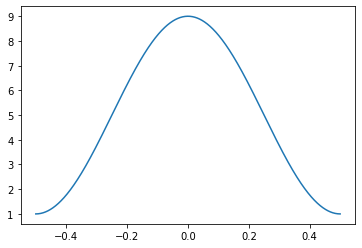

In [3]:
import numpy as np

def psd(f):
  return 5 + 4 * np.cos(2 * np.pi * f)

plot(psd)

Let's also check the PSD by integrating over "all" frequencies. (Remember that for discrete signals, we only include frequencies below the Nyquist limit.) We know we should recover the average expected power in the signal, which is $C_X[0] + \mu^2 = 5 + 0^2 = 5$.

$$\int_{-1/2}^{1/2} S_X(f)\,df = \int_{-1/2}^{1/2} 5 + 4 \cos(2\pi f)\,df = 5. $$

Now, how do we use $S_X(f)$ to find the average expected power below 1000 Hz (when the process is sampled at $f_s = 8000$ Hz)?

We first have to convert 1000 Hz to normalized frequency, $f = 1000 / f_s = 1 / 8$ cycles per sample. Now, we just integrate the PSD below $1/8$. Don't forget the negative frequencies!

$$ \int_{-1/8}^{1/8} S_X(f)\,df = \int_{-1/8}^{1/8} 5 + 4\cos(2\pi f)\,df = 2.15 $$